# Project 4 - Regression Analysis

## Dataset: Suicide Rates Overview

### Osama Hassen

In [4]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
#plt.rcParams.keys()

In [5]:
# Import dataset
#path ='dataset/'
#path = '../input/'
columns = [0,1,2,3,4,5,6,9,10,11] #Only using columns of interest
path = './'
df = pd.read_csv(path+'master.csv', usecols = columns)
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (27820, 10)



,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Data Exploration

In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [8]:
#The summary above shows that pandas is not considering gdp_for_year as a numerical feature; perhaps due to the commas.

#Removing commas from gdp_for_year and setting as float
for m in df.index:
    d=df.loc[m, ' gdp_for_year ($) ']
    e=float(d.replace(',',''))
    df.loc[m, ' gdp_for_year ($) '] = e
    

In [9]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.15662e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.15662e+09,796,Silent


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [11]:
print(type(df[' gdp_for_year ($) ']))
print(type(df.loc[0,' gdp_for_year ($) ']))
df=df.astype({' gdp_for_year ($) ':'float64'}, copy=False)
df.info()
df.describe()

<class 'pandas.core.series.Series'>
<class 'float'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  float64
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


### Check for missing values

Text(0.5, 1.0, 'Missing value in the dataset')

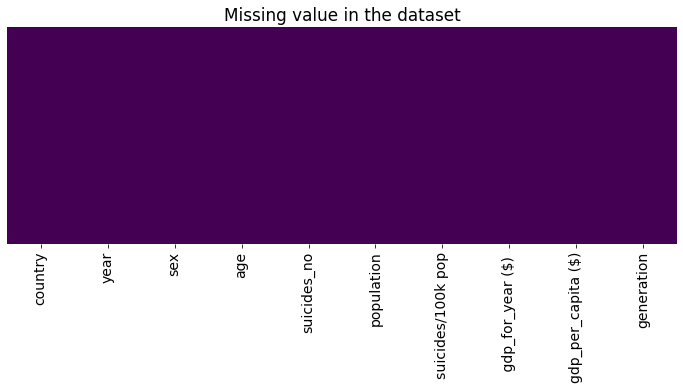

In [12]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

##### No missing data in columns of interest

<AxesSubplot:>

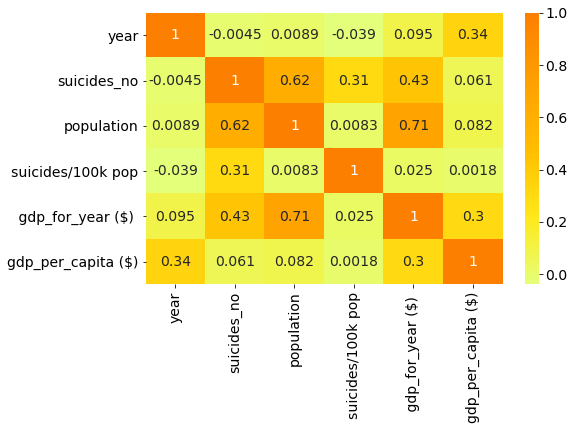

In [13]:
#Question 1
''' Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.'''

# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

##### Target variables are suicides_no & suicides/100k pop. suicide_no has the highest correlation with 'population' (at 0.62) followed by gdp_for_year (at 0.43).  The correlation with suicide rate (suicides/100k pop) is ignored as a trivial correlation since it is a function of suicide_no. Since this is a raw number, the correlation with 'population' is intuitive. The larger the population in a given slice (country, age group, year, generation), the larger the suicide number is expected to be.  A good indication of this the absense of the correlation with population in the suicide rate since the size of the population is taken out of consideration.  What is not intuitive is the correlation with gdp_for_year. This (potentially) means that the higher the overall gdp of a country for a given year, the higher the suicide rate is expected to be. Note that gdp_for_year has a high correlation with population. This explains the lack of correlation between suicide rate and gdp_for_year (since population is taken out of the suicide number) and also the lack of correlation between suicides_no and gdp_per_capita (since population is taken out of the gdp number).

##### 'suicides/100k pop' has the highest correlation with suicide_no (at 0.31) which, again, can be dismissed as part of the calculation and  deoesn't tell us anything new about the data. In fact, the suicide rate is designed to remove the influence of the population of the slice of data on the suicide number (i.e. normalize against population size) so it makes sense that it has a decent correlation with the raw suicide number and almost no correlation with population (the removed influence)

# INCLUDE IN REPORT THAT DATA WAS EXPLORED

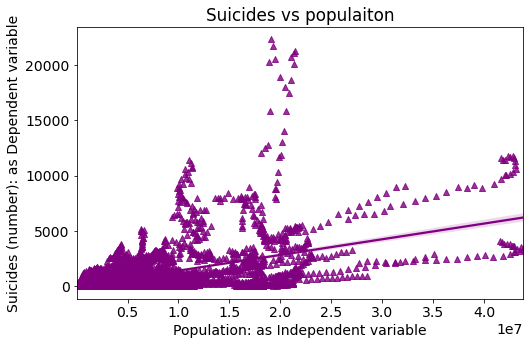

In [14]:
#Scatter plot of suicide numbers vs. population

sns.regplot(x='population',y='suicides_no',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicides (number): as Dependent variable')
plt.title('Suicides vs populaiton');

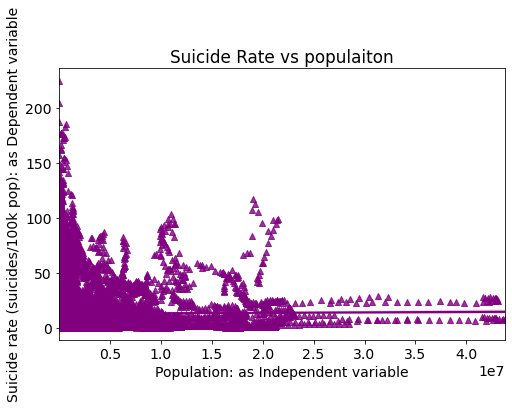

In [15]:
#Scatter plot of suicide rate vs. population

sns.regplot(x='population',y='suicides/100k pop',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicide rate (suicides/100k pop): as Dependent variable')
plt.title('Suicide Rate vs populaiton');

In [16]:
#Question 2
''' Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness? '''
# Numerical features: Year, Population, gdp/capita, gdp/year

def threeplots(data):
    f= plt.figure(figsize=(20,7))
    ax1=f.add_subplot(131)
    sns.histplot(data,bins=40,color='r',ax=ax1)
    ax1.set_title('Histogram of %s' %data.name)
    plt.xticks(rotation=45, fontsize=12)
    
    ax2=f.add_subplot(132)
    sns.histplot(data,bins=40,color='b',ax=ax2, log_scale=True)
    ax2.set_title('Histogram of %s (log10)' %data.name)
    plt.xticks(rotation=45, fontsize=12)
    
    data_bc, lam, ci= boxcox(data, alpha=.05)
    ax3=f.add_subplot(133)
    sns.histplot(data_bc,bins=40,color='g',ax=ax3)
    ax3.set_title('Histogram of %s (Box-Cox)' %data.name)
    plt.xticks(rotation=45, fontsize=12)

In [17]:
ncolumns= [df['year'], df['population'], df['gdp_per_capita ($)'], df[' gdp_for_year ($) ']]

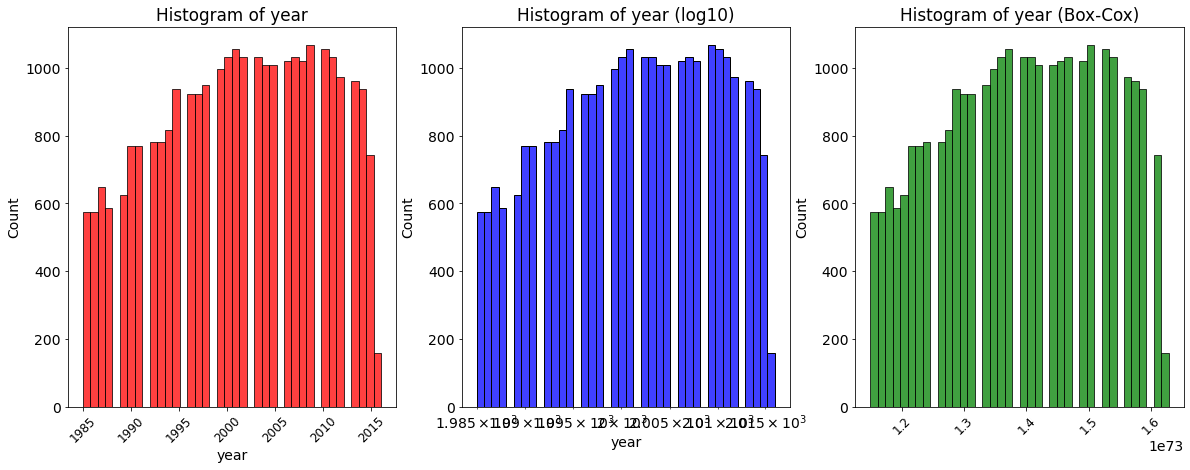

In [18]:
threeplots(ncolumns[0])

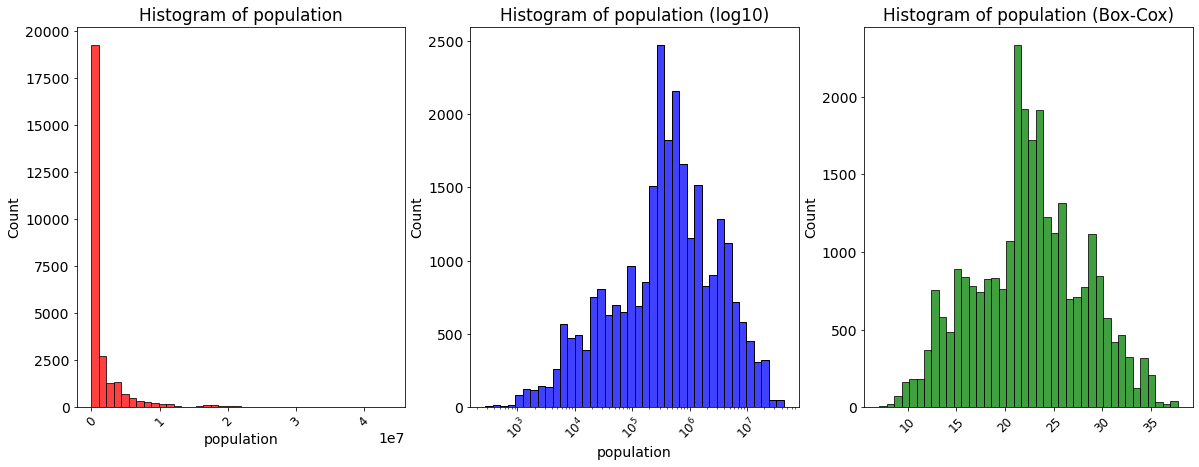

In [19]:
threeplots(ncolumns[1])

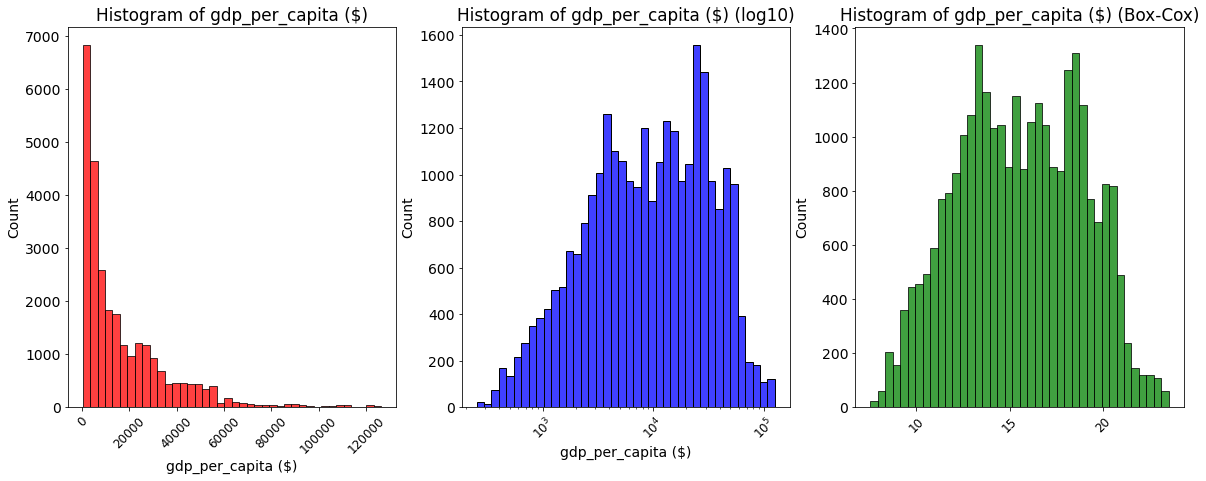

In [20]:
threeplots(ncolumns[2])

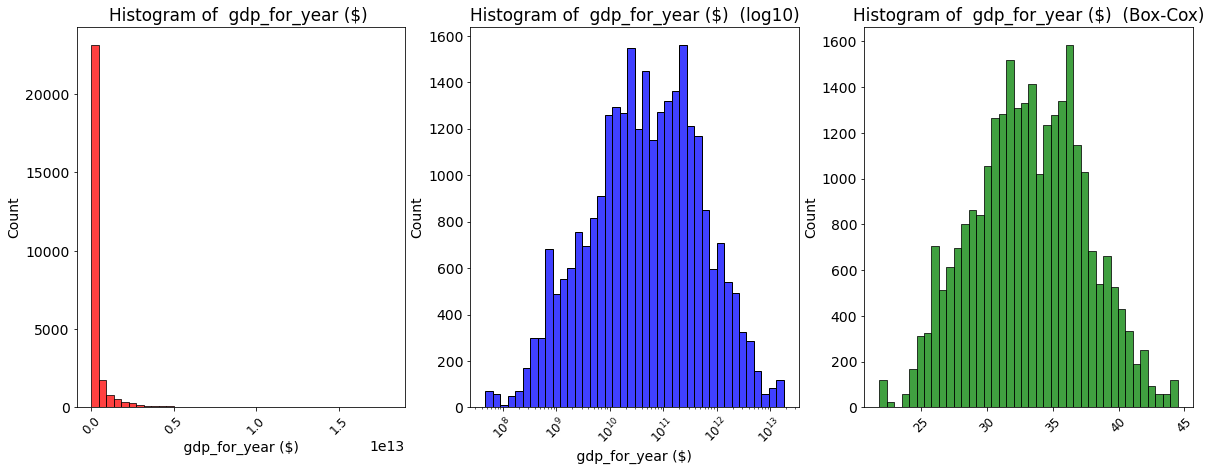

In [21]:
threeplots(ncolumns[3])

In [22]:
#Check for Normality of each dataset, its log transform and Box-Cox transform using Shapiro-Wilk Test:
from scipy.stats import shapiro

def chnorm(dsets):
    for i in dsets:
        stat, p = shapiro(i)
        print(i.name, 'Raw data stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')
        
        #repeat test for log10 transformation
        stat, p = shapiro(np.log10(i))
        print(i.name, 'log10 transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')        
   
        #repeat test for Box-Cox transformation
        data_bc, lam, ci= boxcox(i, alpha=.05)
        stat, p = shapiro(data_bc)
        print(i.name, 'Box-Cox transformation stat=%.3f, p=%.3f' % (stat, p))
        if p > .05:
            print('Probably Gaussian Distribution\n')
        else:
            print('Probably NOT Gaussian Distribution\n')

In [23]:
chnorm(ncolumns)

C:\Users\ohass\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


year Raw data stat=0.963, p=0.000
Probably NOT Gaussian Distribution

year log10 transformation stat=0.913, p=0.000
Probably NOT Gaussian Distribution

year Box-Cox transformation stat=nan, p=1.000
Probably Gaussian Distribution

population Raw data stat=0.491, p=0.000
Probably NOT Gaussian Distribution

population log10 transformation stat=0.982, p=0.000
Probably NOT Gaussian Distribution

population Box-Cox transformation stat=0.993, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) Raw data stat=0.786, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) log10 transformation stat=0.980, p=0.000
Probably NOT Gaussian Distribution

gdp_per_capita ($) Box-Cox transformation stat=0.985, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  Raw data stat=0.304, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  log10 transformation stat=0.994, p=0.000
Probably NOT Gaussian Distribution

 gdp_for_year ($)  Box-Cox transformation stat=0.996, p=0.

In [24]:
#Check for Normality of each dataset, its log transform and Box-Cox transform using Probability Plot (Quantile-Quantile Plot):
import scipy.stats as stats
import pylab

def prplot(dsets):
    for i in dsets:
        stats.probplot(i, dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for ', i.name)
        pylab.show()

        #repeat test for log10 transformation
        stats.probplot(np.log10(i), dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for log10 of', i.name)
        pylab.show()
    
        #repeat test for Box-Cox transformation
        data_bc, lam, ci= boxcox(i, alpha=.05)
        stats.probplot(data_bc, dist='norm', plot=pylab, rvalue=True)
        print('Probability plot for Box-Cox of', i.name)
        pylab.show()
               

Probability plot for  year


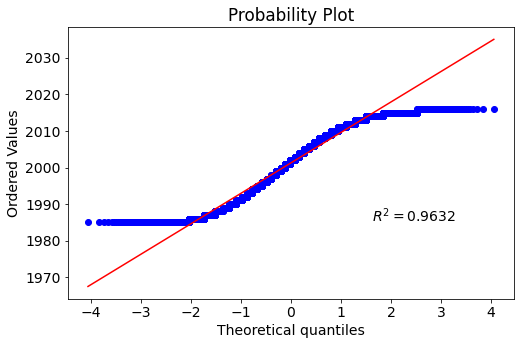

Probability plot for log10 of year


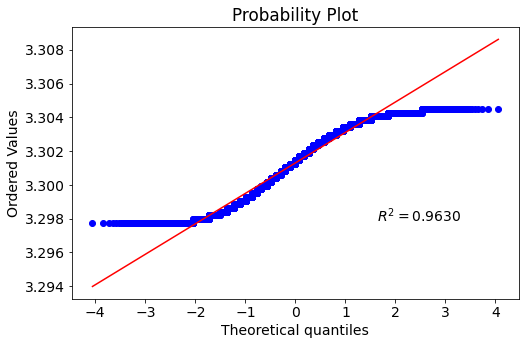

Probability plot for Box-Cox of year


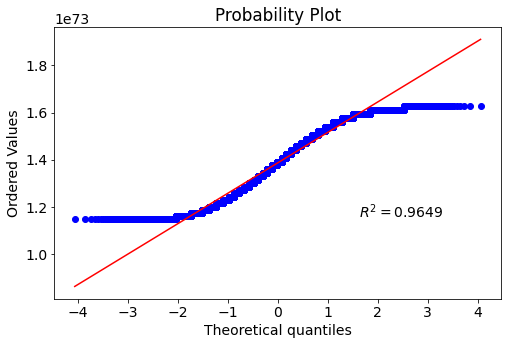

Probability plot for  population


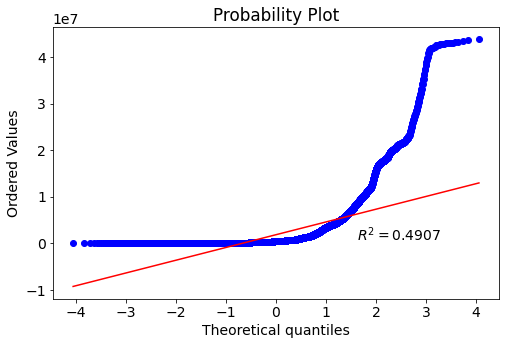

Probability plot for log10 of population


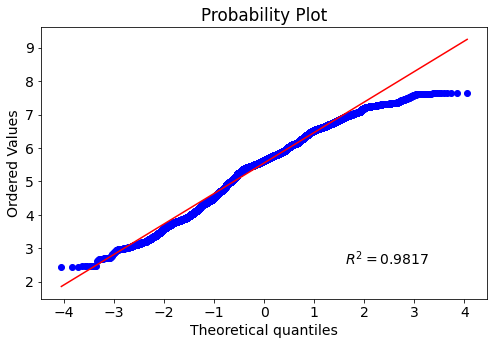

Probability plot for Box-Cox of population


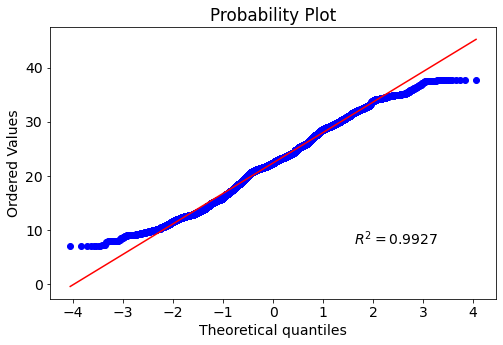

Probability plot for  gdp_per_capita ($)


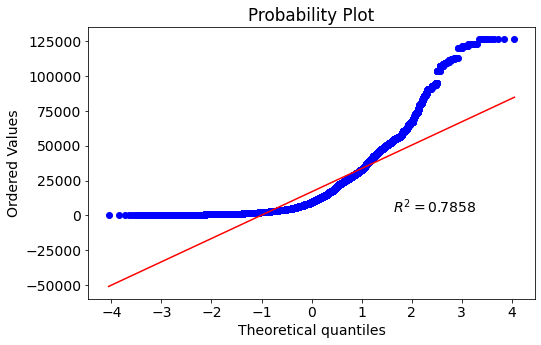

Probability plot for log10 of gdp_per_capita ($)


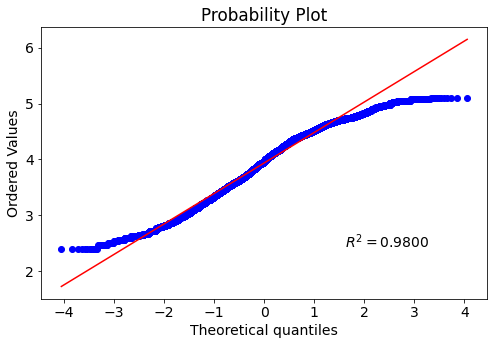

Probability plot for Box-Cox of gdp_per_capita ($)


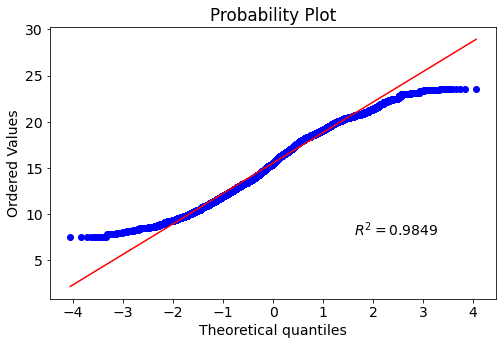

Probability plot for   gdp_for_year ($) 


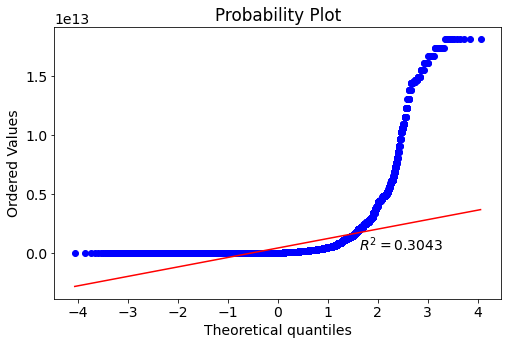

Probability plot for log10 of  gdp_for_year ($) 


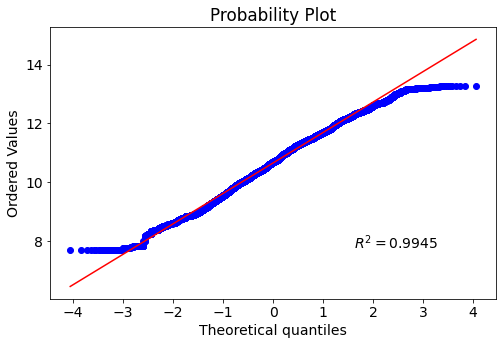

Probability plot for Box-Cox of  gdp_for_year ($) 


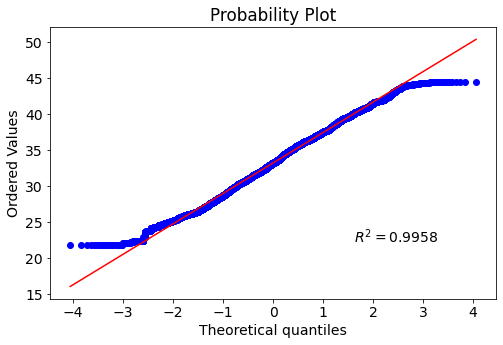

In [25]:
prplot(ncolumns)

#### Box-Cox or log transformation can be applied to high skewness distributions to get them closer to Normality. Normality is an important asumption for many statistical analysis methods.  The Shapiro-Wilk Test shows that none of the features and most transformations aren't a good fit for Normal distribution. The only exception is the Box-Cox transformation of 'year'.

#### The Probability Plots allow us to rank the transformations for each feature and select the closest to Normality.  The Box-Cox transformation is the best to get all features closes to Normaility and therefore will be used for all numeric features.



In [26]:
#adding Box-Cox Tranformations of number features to the df as new columns
df2=df.copy()
#ncolumns= [df['year'], df['population'], df['gdp_per_capita ($)'], df[' gdp_for_year ($) ']]
yr_bc, ylam, yci= boxcox(ncolumns[0], alpha=.05)
pop_bc, poplam, popci= boxcox(ncolumns[1], alpha=.05)
gdpc_bc, gdpclam, gdpcci= boxcox(ncolumns[2], alpha=.05)
gdpyr_bc, gdpyrlam, gdpyrci= boxcox(ncolumns[3], alpha=.05)

#df2['yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc'] = [yr_bc, pop_bc, gdpc_bc, gdpyr_bc]

df2['yr_bc'] = yr_bc
df2['pop_bc'] = pop_bc
df2['gdpc_bc'] = gdpc_bc
df2['gdpyr_bc'] = gdpyr_bc
df2.info

<bound method DataFrame.info of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop   gdp_for_year ($)   gdp_per_capita ($)  \
0                   6.7

(0.0, 1000.0)

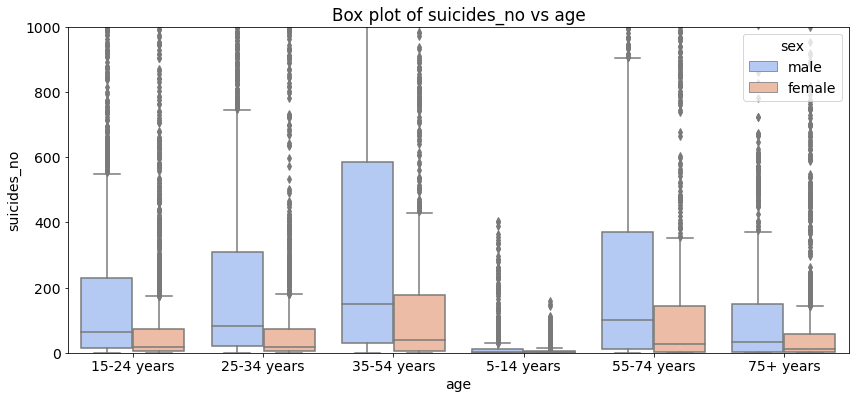

In [27]:
#Question 3
'''Inspect box plot of categorical features vs target variable. What intuition do you
get?'''

plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no',hue='sex',data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


(0.0, 1000.0)

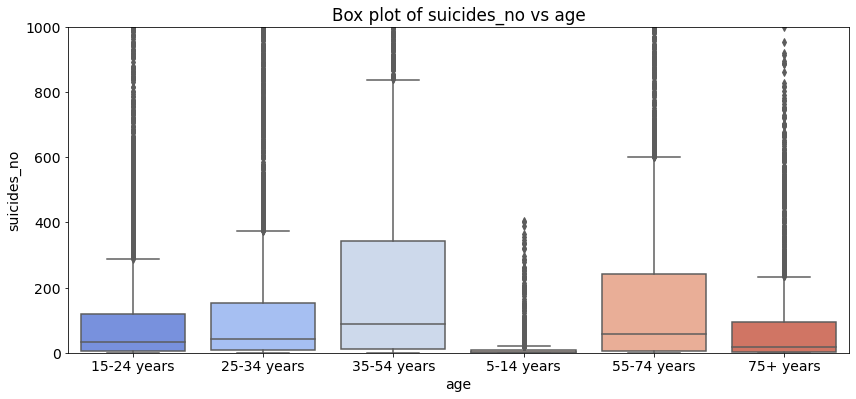

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no', data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


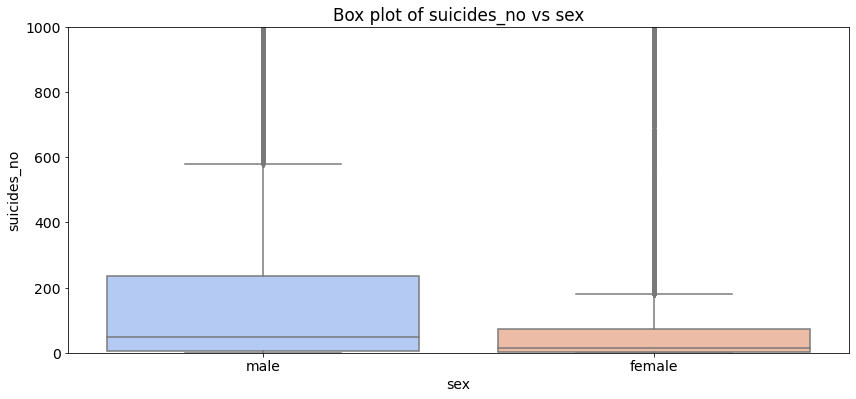

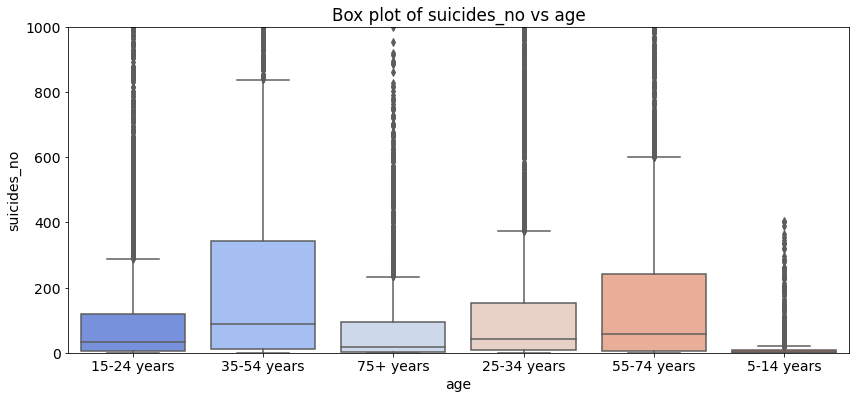

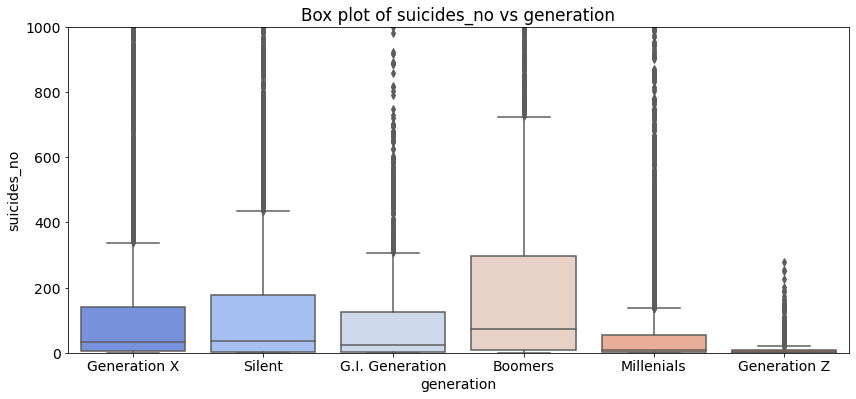

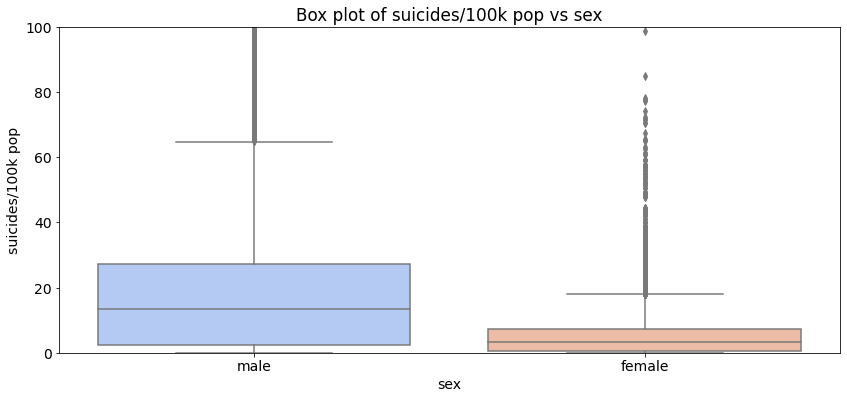

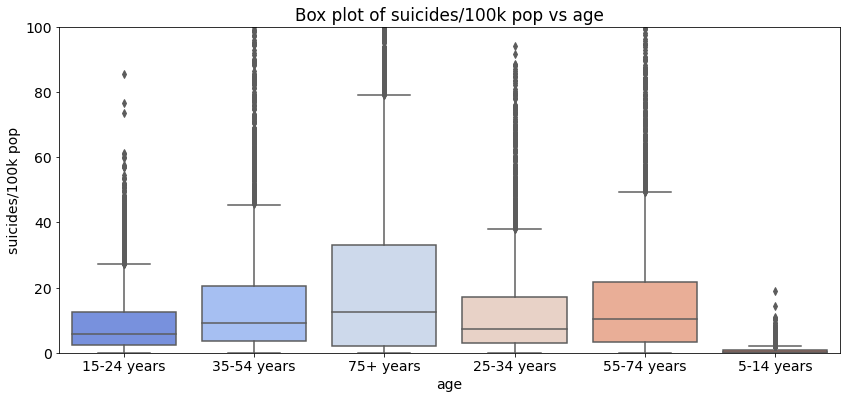

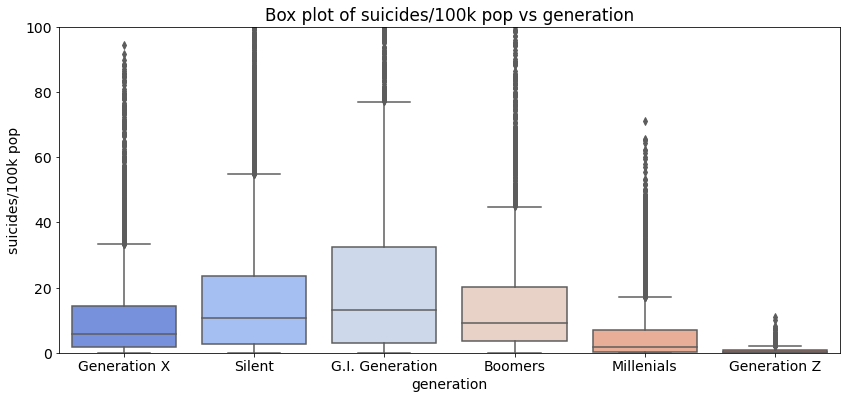

In [29]:
targets = ['suicides_no', 'suicides/100k pop']
categories = ['sex', 'age', 'generation']

for i in targets:
    for j in categories:
        plt.figure(figsize=(14,6))
        sns.boxplot(x=j, y=i, data=df,palette='coolwarm')
        plt.title('Box plot of %s vs %s' % (i, j))
        if i == 'suicides_no':
            plt.ylim(0, 1000)
        else:
            plt.ylim(0, 100)



#### Project only considering suicide rate as target. Both targets used just to explore difference

In [30]:
#Question 5
'''For the suicide rate dataset, pick the top 10 countries that have the longest time-span of records (in terms of years). Plot the suicide rate (“suicides/100k pop”)
against time for different age groups and gender, and explain your observations
(Hint: try seaborn.relplot)'''

top10_span_yrs = ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']
#t10_df=df.query("country in ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']")
t10_df2=df2.query("country in ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']")
t10_df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,yr_bc,pop_bc,gdpc_bc,gdpyr_bc
264,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,240923926.0,3850,Generation X,1.148544e+73,12.943489,13.275788,24.367894
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,240923926.0,3850,Boomers,1.148544e+73,12.554999,13.275788,24.367894
266,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,240923926.0,3850,Silent,1.148544e+73,12.500998,13.275788,24.367894
267,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,240923926.0,3850,Generation X,1.148544e+73,12.844880,13.275788,24.367894
268,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,240923926.0,3850,G.I. Generation,1.148544e+73,11.550003,13.275788,24.367894


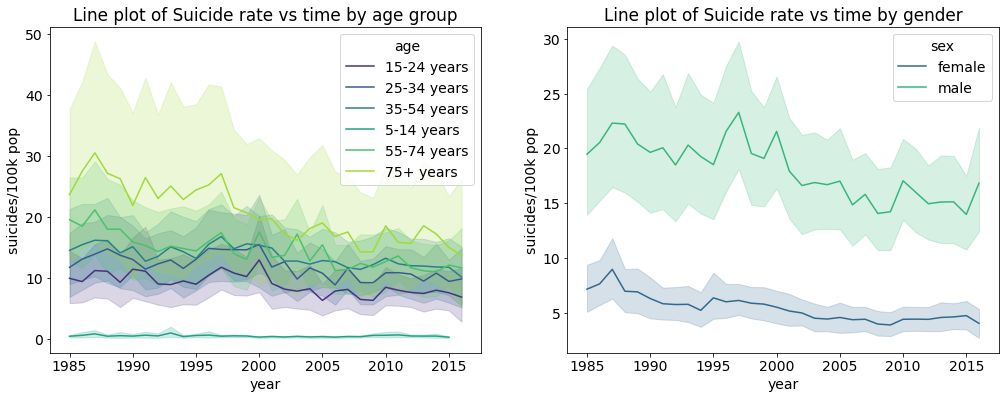

In [31]:
#Plot the suicide rate (“suicides/100k pop”) vs time for different age groups and gender, and explain your observations

f = plt.figure(figsize=(17,6))
ax = f.add_subplot(121)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df2,palette='viridis',hue='age',ax=ax)
ax.set_title('Line plot of Suicide rate vs time by age group')

ax = f.add_subplot(122)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df2,palette='viridis',hue='sex')
ax.set_title('Line plot of Suicide rate vs time by gender')
plt.savefig('sc.png');

#### In the filtered data (top 10 countries with data time span), the overall trend of suicide rates over the years is a downward trend for (almost) all age groups and both genders. In the plot by age group, seniors in the 75+ age group seem to commit suicides at a consistently higher rate than younger adults despite the downward trend. The rate is lowest for the youngest age group (5-14 years) and remains relatively flat over time. The other 4 age groups have suicide rates that fall in between the other 2; ranging approximately between 10 and 20 suicides per 100,000 people.

#### The suicide rate by gender group shows that males commit suicide at approximately 3 times the rate of females with both having an overall downard trend over time.

In [32]:
#Question 7
''' Can you explain a trade-off
here (between one-hot and label encoding)? (Hint: let us assume we perform linear regression, what information does one-hot
encoding discard, and what assumption should hold strongly if we perform the scalar
encoding instead?) (Question 7)
For the suicide rate dataset, the number of unique countries for the variable “country” is
pretty high. We suggest you to group these countries into same continent countries such
as Europe, North America, South America, Middle East and Asia. Using a new variable
with lower number of classes in this category, you may proceed with one-hot encoding'''

path = './'
ccdf = pd.read_csv(path+'continent_country.csv')
print(ccdf.head())
print(df.shape)
print(ccdf.shape)



  Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina
(27820, 10)
(194, 2)


#### Numerical (or label) encoding has the advantage of maintaining the granularity of the data within a single column. However, the fact that categories are changed to integers means that the model will "rank" the categories when there is no actual ranking to the values. 
#### One-hot encoding gets rid of the issue of ranking categories but the trade off is that, since the feature in question will be converted from a single column to multiple 0/1 columns (one for each unique value), it creates many dummy variables for the given feature. This in turn causes a false high correlation between those columns/features creating a multicollinearity problem.

In [33]:
#Creating n_df and adding 'continent' field
n_df=df2.copy()

for n in ccdf.index:
    x=ccdf.loc[n,'Country']
    y=ccdf.loc[n,'Continent']
    n_df.loc[n_df['country'] == x,'continent'] = str(y)
       

n_df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,yr_bc,pop_bc,gdpc_bc,gdpyr_bc,continent
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,6.306708e+10,2309,Generation X,1.593246e+73,28.799185,12.070149,33.686291,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,6.306708e+10,2309,Silent,1.593246e+73,21.857039,12.070149,33.686291,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,6.306708e+10,2309,Generation Z,1.593246e+73,27.930184,12.070149,33.686291,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,6.306708e+10,2309,Generation Z,1.593246e+73,27.776664,12.070149,33.686291,Asia
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,6.306708e+10,2309,Boomers,1.593246e+73,25.910476,12.070149,33.686291,Asia


In [34]:
ndf=n_df.copy()
#ndf= ndf.drop(['country'], axis=1) 
ndf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,yr_bc,pop_bc,gdpc_bc,gdpyr_bc,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,1.174942e+73,21.567237,9.761288,27.892885,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,1.174942e+73,21.524951,9.761288,27.892885,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,1.174942e+73,21.361340,9.761288,27.892885,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,1.174942e+73,15.118446,9.761288,27.892885,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,1.174942e+73,21.216097,9.761288,27.892885,Europe


### Label encoding will be used for 'age' since ranking the ages is appropriate in this case. 

In [35]:
### Label encoding will be used for 'age' since ranking the ages is appropriate in this case. 
#5-14 years = '0'
#15-24 years = '1'
#25-34 years = '2'
#35-54 years = '3'
#55-74 years = '4'
#75+ years = '5'

age_list=list(ndf.age.unique())
df_encode_age=ndf.copy()
for j in ndf.index:
    d=df_encode_age.loc[j, 'age']
    if d == '5-14 years':
        df_encode_age.loc[j, 'age'] = int(0)
    elif d== '15-24 years':
        df_encode_age.loc[j, 'age'] = int(1)
    elif d== '25-34 years':
        df_encode_age.loc[j, 'age'] = int(2)
    elif d== '35-54 years':
        df_encode_age.loc[j, 'age'] = int(3)
    elif d== '55-74 years':
        df_encode_age.loc[j, 'age'] = int(4)
    elif d== '75+ years':
        df_encode_age.loc[j, 'age'] = int(5)

df_encode_age.age.unique()


array([1, 3, 5, 2, 4, 0], dtype=object)

In [36]:
df_encode_age = df_encode_age.astype({'age':'int8'}, copy=False)
df_encode_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  int8   
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  float64
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  yr_bc               27820 non-null  float64
 11  pop_bc              27820 non-null  float64
 12  gdpc_bc             27820 non-null  float64
 13  gdpyr_bc            27820 non-null  float64
 14  continent           25890 non-null  object 
dtypes: float64(6), int64(4), int8(1), object(4)
memory us

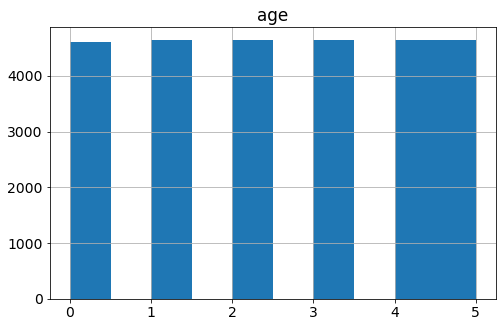

In [40]:
hist_age=df_encode_age.hist(column='age')

In [41]:
# Dummy variable
categorical_columns = ['continent','sex', 'generation']
df_encode = pd.get_dummies(data = df_encode_age, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [42]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',ndf.columns.values)
print('\nNumber of rows and columns in the dataset:',ndf.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
df_encode.info()
df_encode.head()

Columns in original data frame:
 ['country' 'year' 'sex' 'age' 'suicides_no' 'population'
 'suicides/100k pop' ' gdp_for_year ($) ' 'gdp_per_capita ($)'
 'generation' 'yr_bc' 'pop_bc' 'gdpc_bc' 'gdpyr_bc' 'continent']

Number of rows and columns in the dataset: (27820, 15)

Columns in data frame after encoding dummy variable:
 ['country' 'year' 'age' 'suicides_no' 'population' 'suicides/100k pop'
 ' gdp_for_year ($) ' 'gdp_per_capita ($)' 'yr_bc' 'pop_bc' 'gdpc_bc'
 'gdpyr_bc' 'continent_Asia' 'continent_Europe' 'continent_North America'
 'continent_Oceania' 'continent_South America' 'sex_male'
 'generation_G.I. Generation' 'generation_Generation X'
 'generation_Generation Z' 'generation_Millenials' 'generation_Silent']

Number of rows and columns in the dataset: (27820, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      -------------- 

,country,year,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),yr_bc,pop_bc,...,continent_Europe,continent_North America,continent_Oceania,continent_South America,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,1,21,312900,6.71,2.156625e+09,796,1.174942e+73,21.567237,...,1,0,0,0,1,0,1,0,0,0
1,Albania,1987,3,16,308000,5.19,2.156625e+09,796,1.174942e+73,21.524951,...,1,0,0,0,1,0,0,0,0,1
2,Albania,1987,1,14,289700,4.83,2.156625e+09,796,1.174942e+73,21.361340,...,1,0,0,0,0,0,1,0,0,0
3,Albania,1987,5,1,21800,4.59,2.156625e+09,796,1.174942e+73,15.118446,...,1,0,0,0,1,1,0,0,0,0
4,Albania,1987,2,9,274300,3.28,2.156625e+09,796,1.174942e+73,21.216097,...,1,0,0,0,1,0,0,0,0,0


In [43]:
#Question 8
'''Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more-or-less look like
standard normally distributed data: Gaussian with zero mean and unit variance. If a feature has a variance that is orders of magnitude larger than others, it might dominate the
objective function and make the estimator unable to learn from other features correctly
as expected.
Standardize feature columns and prepare them for training. '''

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler

#df_nf=df_encode[['age', 'yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc']].copy()  #numerical and scalar encoded columns to be Standardized
#df_tar=df_encode[['suicides/100k pop']].copy()  #target column to be standardized
#
#scaler = StandardScaler()
#nft_sc_arr = scaler.fit_transform(df_nf) #numerical feature scaler
#targ_sc_arr = scaler.fit_transform(df_tar) #target scaler


In [44]:
ft0=['age', 'yr_bc', 'pop_bc', 'gdpc_bc', 'gdpyr_bc']  #numerical and scalar encoded columns to be Standardized

preprocess = make_column_transformer(
    (StandardScaler(),ft0),
    remainder='passthrough')

ft_res = preprocess.fit_transform(df_encode[ft0])


In [45]:
print(type(ft_res))
print(ft_res.shape)
ft_res[:10]

<class 'numpy.ndarray'>
(27820, 5)


array([[-0.88057409, -1.61197582, -0.1492128 , -1.74474794, -1.25559915],
       [ 0.29127816, -1.61197582, -0.15670966, -1.74474794, -1.25559915],
       [-0.88057409, -1.61197582, -0.18571623, -1.74474794, -1.25559915],
       [ 1.4631304 , -1.61197582, -1.29252015, -1.74474794, -1.25559915],
       [-0.29464797, -1.61197582, -0.21146648, -1.74474794, -1.25559915],
       [ 1.4631304 , -1.61197582, -1.09946497, -1.74474794, -1.25559915],
       [ 0.29127816, -1.61197582, -0.20380697, -1.74474794, -1.25559915],
       [-0.29464797, -1.61197582, -0.24167024, -1.74474794, -1.25559915],
       [ 0.87720428, -1.61197582, -0.52774443, -1.74474794, -1.25559915],
       [-1.46650021, -1.61197582, -0.15210681, -1.74474794, -1.25559915]])

In [46]:
#Creating a df with standardized features
std_ft_df = pd.DataFrame(ft_res, columns={'age_std', 'yr_bc_std', 'pop_bc_std', 'gdpc_bc_std', 'gdpyr_bc_std'})
print(std_ft_df.head())
std_ft_df.info()

   gdpyr_bc_std   age_std  pop_bc_std  gdpc_bc_std  yr_bc_std
0     -0.880574 -1.611976   -0.149213    -1.744748  -1.255599
1      0.291278 -1.611976   -0.156710    -1.744748  -1.255599
2     -0.880574 -1.611976   -0.185716    -1.744748  -1.255599
3      1.463130 -1.611976   -1.292520    -1.744748  -1.255599
4     -0.294648 -1.611976   -0.211466    -1.744748  -1.255599
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gdpyr_bc_std  27820 non-null  float64
 1   age_std       27820 non-null  float64
 2   pop_bc_std    27820 non-null  float64
 3   gdpc_bc_std   27820 non-null  float64
 4   yr_bc_std     27820 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [47]:
#combining standardized features with One-Hot features and Target in df

df_temp=df_encode.iloc[:,12:]
df_temp['suicides/100k pop']=df_encode['suicides/100k pop']
std_ft_df = pd.concat([std_ft_df, df_temp], axis=1)
std_ft_df.info()
std_ft_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gdpyr_bc_std                27820 non-null  float64
 1   age_std                     27820 non-null  float64
 2   pop_bc_std                  27820 non-null  float64
 3   gdpc_bc_std                 27820 non-null  float64
 4   yr_bc_std                   27820 non-null  float64
 5   continent_Asia              27820 non-null  int8   
 6   continent_Europe            27820 non-null  int8   
 7   continent_North America     27820 non-null  int8   
 8   continent_Oceania           27820 non-null  int8   
 9   continent_South America     27820 non-null  int8   
 10  sex_male                    27820 non-null  int8   
 11  generation_G.I. Generation  27820 non-null  int8   
 12  generation_Generation X     27820 non-null  int8   
 13  generation_Generation Z     278

,gdpyr_bc_std,age_std,pop_bc_std,gdpc_bc_std,yr_bc_std,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,suicides/100k pop
count,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,-4.508336e-17,-1.724366e-15,2.993053e-16,3.085478e-16,-4.983243e-16,0.157225,0.420705,0.174191,0.034939,0.113444,0.500000,0.098634,0.230338,0.052840,0.210065,0.228756,12.816097
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.364019,0.493681,0.379281,0.183628,0.317140,0.500009,0.298175,0.421057,0.223717,0.407362,0.420040,18.961511
min,-1.466500e+00,-1.812971e+00,-2.720554e+00,-2.413887e+00,-2.682474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.805741e-01,-7.629609e-01,-6.789575e-01,-7.664912e-01,-6.902430e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920000
50%,2.912782e-01,4.261309e-02,3.930678e-03,-4.959222e-03,-9.816287e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.990000
75%,8.772043e-01,7.831443e-01,6.381017e-01,8.212447e-01,7.200545e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.620000
max,1.463130e+00,1.847723e+00,2.715657e+00,2.404059e+00,2.663054e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.970000


array([[<AxesSubplot:title={'center':'suicides/100k pop'}>]], dtype=object)

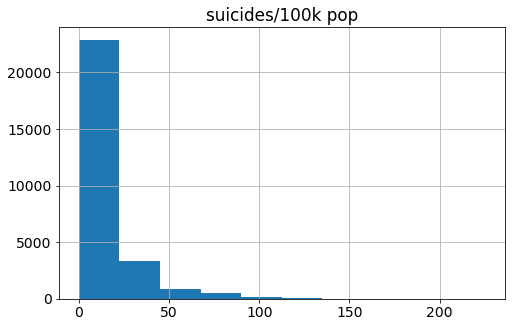

In [63]:
std_ft_df.hist(column='suicides/100k pop')

In [52]:
#from sklearn.model_selection import train_test_split
X = std_ft_df.drop('suicides/100k pop',axis=1) # Independet variable
y = std_ft_df['suicides/100k pop'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
#Question 9
'''
• sklearn.feature_selection.mutual_info_regression function returns estimated
mutual information between each feature and the label. Mutual information (MI)
between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables
are independent, and higher values mean higher dependency.
• sklearn.feature_selection.f_regression function provides F scores, which is a
way of comparing the significance of the improvement of a model, with respect to
the addition of new variables.

You may use these functions to select most important features. How does this step affect
the performance of your models in terms of test RMSE? '''



#### The mutual_info_regression function can be used to select the best features to use for model training and/or drop some features becaue of high mutual information. When two features have high MI rate, it would not be useful to use both in the training of the model. 

#### The f_regression function would be used to determine which features have the strongest effect on the model accuracy. The F-scores of different features can be used to determine whether or not a feature adds significant accuracy to the model and a decision can be made on whether to keep it or drop it.

#### Selecting features based on the two tools above should reduce the RMSE

In [ ]:
#Question 10
'''
Linear Regression
What is the objective function? Train ordinary least squares (linear regression without
regularization), as well as Lasso and Ridge regression, and compare their performances.
Answer the following questions.
• Explain how each regularization scheme affects the learned hypotheses. (Question
10)
'''

In [53]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [54]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [55]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,3.584067,3.584067
1,theta_1,gdpyr_bc_std,10.463819,10.463819
2,theta_2,age_std,-1.694302,-1.694302
3,theta_3,pop_bc_std,1.939014,1.939014
4,theta_4,gdpc_bc_std,-0.068614,-0.068614
5,theta_5,yr_bc_std,-0.392944,-0.392944
6,theta_6,continent_Asia,0.314170,0.314170
7,theta_7,continent_Europe,3.586422,3.586422
8,theta_8,continent_North America,-5.030437,-5.030437
9,theta_9,continent_Oceania,-0.509295,-0.509295


In [56]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  252.31721113396014
R square obtain for normal equation method is : 0.31742399887975914


In [57]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  252.31721113396014
R square obtain for scikit learn library is : 0.31742399887975914


### Ridge Regressor

In [62]:
#Ridge Regressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()

params={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5) 
ridge_regressor.fit(X_train,y_train)

#Show best alpha for model:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1}
-237.28064299548572


1e-05

In [1]:
from sklearn.feature_selection import f_regression, mutual_info_regression

#f_test, _ = f_regression(X_train, y_train, copy=True)
#f_test /= np.max(f_test)
#
#mi = mutual_info_regression(X_train, y_train, copy=True)
#mi /= np.max(mi)